In [1]:
# 배치 정규화, 이미지 확대, DCGAN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Input, Flatten, Dropout, BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
# 생성자 모델 생성
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))  # 입력층 -> layer 1
generator.add(BatchNormalization())  # 배치 정규화 :  평균이 0, 분산이 1 인 데이터로 재배치
generator.add(Reshape((7,7,128)))     # 3차원으로 데이터 타입 변경
generator.add(UpSampling2D())     # 이미지를 2배로 확장 시킴 ( 14,14,128)
generator.add(Conv2D(64, kernel_size=5, padding='same'))  # padding='same', 이미지 사이즈 줄지 않음
generator.add(BatchNormalization())   # 배치 정규화
generator.add(Activation(LeakyReLU(0.2)))  # 활성화 함수 추가
generator.add(UpSampling2D())     # 이미지 확대 : (28,28,128)
generator.add(Conv2D(1, kernel_size=5, padding ='same', activation='tanh')) # 최종 가짜 이미지 생성

In [4]:
# 판별자 모델 생성
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))  # CNN 같은 사이즈
discriminator.add(Activation(LeakyReLU(0.2)))  # 활성화 함수
discriminator.add(Dropout(0.3)) # 과적합 방지
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))  # CNN  같은 사이즈
discriminator.add(Activation(LeakyReLU(0.2)))  # 활성화 함수
discriminator.add(Dropout(0.3)) # 과적합 방지
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False  # 학습하지 않음

In [5]:
# 생성자와 판별자 모델을 연결 시켜서 GAN모델 생성
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [6]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 batch_normalization (BatchN  (None, 6272)             25088     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        204864    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [7]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 activation_2 (Activation)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

1/1 [==============================] - 0s 118ms/step
epoch:2001.0000, d_loss:0.4811, g_loss:2.4829
1/1 [==============================] - 0s 118ms/step
epoch:2001.0000, d_loss:0.2971, g_loss:2.2608
1/1 [==============================] - 0s 117ms/step
epoch:2001.0000, d_loss:0.3159, g_loss:2.3635
1/1 [==============================] - 0s 115ms/step
epoch:2001.0000, d_loss:0.4095, g_loss:2.6241
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.4050, g_loss:2.6503
1/1 [==============================] - 0s 121ms/step
epoch:2001.0000, d_loss:0.3094, g_loss:2.5980
1/1 [==============================] - 0s 139ms/step
epoch:2001.0000, d_loss:0.2956, g_loss:2.5473
1/1 [==============================] - 0s 181ms/step
epoch:2001.0000, d_loss:0.2417, g_loss:2.3268
1/1 [==============================] - 0s 181ms/step
epoch:2001.0000, d_loss:0.2496, g_loss:2.6173
1/1 [==============================] - 0s 121ms/step
epoch:2001.0000, d_loss:0.2468, g_loss:2.4148
1/1 [=====

1/1 [==============================] - 0s 106ms/step
epoch:2001.0000, d_loss:0.2285, g_loss:2.3966
1/1 [==============================] - 0s 107ms/step
epoch:2001.0000, d_loss:0.2592, g_loss:2.8144
1/1 [==============================] - 0s 106ms/step
epoch:2001.0000, d_loss:0.2520, g_loss:2.8700
1/1 [==============================] - 0s 104ms/step
epoch:2001.0000, d_loss:0.3149, g_loss:2.3945
1/1 [==============================] - 0s 105ms/step
epoch:2001.0000, d_loss:0.2914, g_loss:2.1835
1/1 [==============================] - 0s 107ms/step
epoch:2001.0000, d_loss:0.2522, g_loss:1.9019
1/1 [==============================] - 0s 104ms/step
epoch:2001.0000, d_loss:0.2482, g_loss:2.1157
1/1 [==============================] - 0s 103ms/step
epoch:2001.0000, d_loss:0.2104, g_loss:2.9302
1/1 [==============================] - 0s 111ms/step
epoch:2001.0000, d_loss:0.2418, g_loss:3.2655
1/1 [==============================] - 0s 105ms/step
epoch:2001.0000, d_loss:0.1869, g_loss:3.4773
1/1 [=====

1/1 [==============================] - 0s 131ms/step
epoch:2001.0000, d_loss:0.4966, g_loss:2.2170
1/1 [==============================] - 0s 124ms/step
epoch:2001.0000, d_loss:0.2703, g_loss:2.4354
1/1 [==============================] - 0s 119ms/step
epoch:2001.0000, d_loss:0.2915, g_loss:2.2205
1/1 [==============================] - 0s 120ms/step
epoch:2001.0000, d_loss:0.4228, g_loss:2.2303
1/1 [==============================] - 0s 113ms/step
epoch:2001.0000, d_loss:0.3839, g_loss:1.6443
1/1 [==============================] - 0s 123ms/step
epoch:2001.0000, d_loss:0.2377, g_loss:1.9425
1/1 [==============================] - 0s 117ms/step
epoch:2001.0000, d_loss:0.3763, g_loss:1.8690
1/1 [==============================] - 0s 118ms/step
epoch:2001.0000, d_loss:0.2165, g_loss:2.5692
1/1 [==============================] - 0s 124ms/step
epoch:2001.0000, d_loss:0.2774, g_loss:1.9204
1/1 [==============================] - 0s 110ms/step
epoch:2001.0000, d_loss:0.3656, g_loss:1.8690
1/1 [=====

1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.6718, g_loss:1.5643
1/1 [==============================] - 0s 129ms/step
epoch:2001.0000, d_loss:1.1785, g_loss:1.3037
1/1 [==============================] - 0s 138ms/step
epoch:2001.0000, d_loss:1.1226, g_loss:0.8477
1/1 [==============================] - 0s 136ms/step
epoch:2001.0000, d_loss:0.7262, g_loss:1.2633
1/1 [==============================] - 0s 124ms/step
epoch:2001.0000, d_loss:0.7273, g_loss:1.2093
1/1 [==============================] - 0s 125ms/step
epoch:2001.0000, d_loss:0.8114, g_loss:2.0586
1/1 [==============================] - 0s 119ms/step
epoch:2001.0000, d_loss:0.5413, g_loss:2.8333
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.6462, g_loss:2.3120
1/1 [==============================] - 0s 135ms/step
epoch:2001.0000, d_loss:0.5707, g_loss:2.1454
1/1 [==============================] - 0s 136ms/step
epoch:2001.0000, d_loss:0.3965, g_loss:1.8665
1/1 [=====

1/1 [==============================] - 0s 127ms/step
epoch:2001.0000, d_loss:0.3069, g_loss:2.4683
1/1 [==============================] - 0s 132ms/step
epoch:2001.0000, d_loss:0.3461, g_loss:2.0076
1/1 [==============================] - 0s 132ms/step
epoch:2001.0000, d_loss:0.4245, g_loss:1.9894
1/1 [==============================] - 0s 129ms/step
epoch:2001.0000, d_loss:0.2925, g_loss:1.6750
1/1 [==============================] - 0s 134ms/step
epoch:2001.0000, d_loss:0.4487, g_loss:1.7047
1/1 [==============================] - 0s 133ms/step
epoch:2001.0000, d_loss:0.3970, g_loss:1.8323
1/1 [==============================] - 0s 134ms/step
epoch:2001.0000, d_loss:0.3405, g_loss:1.9404
1/1 [==============================] - 0s 142ms/step
epoch:2001.0000, d_loss:0.3625, g_loss:2.2192
1/1 [==============================] - 0s 138ms/step
epoch:2001.0000, d_loss:0.2977, g_loss:2.2988
1/1 [==============================] - 0s 133ms/step
epoch:2001.0000, d_loss:0.3023, g_loss:2.1673
1/1 [=====

1/1 [==============================] - 0s 132ms/step
epoch:2001.0000, d_loss:0.5254, g_loss:1.4435
1/1 [==============================] - 0s 131ms/step
epoch:2001.0000, d_loss:0.4981, g_loss:1.1305
1/1 [==============================] - 0s 133ms/step
epoch:2001.0000, d_loss:0.4620, g_loss:1.7249
1/1 [==============================] - 0s 133ms/step
epoch:2001.0000, d_loss:0.2903, g_loss:1.9020
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.4756, g_loss:1.8957
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.3351, g_loss:2.3457
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.5119, g_loss:2.0079
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.4078, g_loss:1.9175
1/1 [==============================] - 0s 128ms/step
epoch:2001.0000, d_loss:0.5677, g_loss:1.4985
1/1 [==============================] - 0s 136ms/step
epoch:2001.0000, d_loss:0.4315, g_loss:1.3295
1/1 [=====

1/1 [==============================] - 0s 142ms/step
epoch:2001.0000, d_loss:0.5877, g_loss:1.4800
1/1 [==============================] - 0s 138ms/step
epoch:2001.0000, d_loss:0.4377, g_loss:1.4330
1/1 [==============================] - 0s 135ms/step
epoch:2001.0000, d_loss:0.4973, g_loss:1.3338
1/1 [==============================] - 0s 150ms/step
epoch:2001.0000, d_loss:0.3655, g_loss:2.1707
1/1 [==============================] - 0s 152ms/step
epoch:2001.0000, d_loss:0.4206, g_loss:2.2301
1/1 [==============================] - 0s 142ms/step
epoch:2001.0000, d_loss:0.7126, g_loss:2.3580
1/1 [==============================] - 0s 138ms/step
epoch:2001.0000, d_loss:0.5979, g_loss:1.7556
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.3960, g_loss:1.5876
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.4190, g_loss:1.3635
1/1 [==============================] - 0s 142ms/step
epoch:2001.0000, d_loss:0.4462, g_loss:1.6648
1/1 [=====

1/1 [==============================] - 0s 140ms/step
epoch:2001.0000, d_loss:0.3591, g_loss:2.3286
1/1 [==============================] - 0s 139ms/step
epoch:2001.0000, d_loss:0.4498, g_loss:2.2240
1/1 [==============================] - 0s 140ms/step
epoch:2001.0000, d_loss:0.3158, g_loss:2.1265
1/1 [==============================] - 0s 142ms/step
epoch:2001.0000, d_loss:0.3807, g_loss:1.8644
1/1 [==============================] - 0s 152ms/step
epoch:2001.0000, d_loss:0.2774, g_loss:2.1435
1/1 [==============================] - 0s 144ms/step
epoch:2001.0000, d_loss:0.3591, g_loss:2.2014
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.2504, g_loss:2.5413
1/1 [==============================] - 0s 137ms/step
epoch:2001.0000, d_loss:0.2879, g_loss:2.5721
1/1 [==============================] - 0s 141ms/step
epoch:2001.0000, d_loss:0.5051, g_loss:2.3170
1/1 [==============================] - 0s 135ms/step
epoch:2001.0000, d_loss:0.2012, g_loss:2.1528
1/1 [=====

1/1 [==============================] - 0s 145ms/step
epoch:2001.0000, d_loss:0.3802, g_loss:2.3090
1/1 [==============================] - 0s 137ms/step
epoch:2001.0000, d_loss:0.4630, g_loss:2.0098
1/1 [==============================] - 0s 145ms/step
epoch:2001.0000, d_loss:0.5712, g_loss:1.5460
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.4374, g_loss:1.9853
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.4453, g_loss:1.8491
1/1 [==============================] - 0s 152ms/step
epoch:2001.0000, d_loss:0.5475, g_loss:1.9736
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.3379, g_loss:2.0880
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.3822, g_loss:2.2824
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.5324, g_loss:2.1080
1/1 [==============================] - 0s 143ms/step
epoch:2001.0000, d_loss:0.4550, g_loss:1.5947
1/1 [=====

1/1 [==============================] - 0s 147ms/step
epoch:2001.0000, d_loss:0.4298, g_loss:2.2556
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.3922, g_loss:1.9142
1/1 [==============================] - 0s 150ms/step
epoch:2001.0000, d_loss:0.3799, g_loss:2.2914
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.3972, g_loss:2.2946
1/1 [==============================] - 0s 151ms/step
epoch:2001.0000, d_loss:0.4134, g_loss:1.9337
1/1 [==============================] - 0s 161ms/step
epoch:2001.0000, d_loss:0.2652, g_loss:1.9209
1/1 [==============================] - 0s 165ms/step
epoch:2001.0000, d_loss:0.3092, g_loss:2.3038
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.3316, g_loss:2.4554
1/1 [==============================] - 0s 144ms/step
epoch:2001.0000, d_loss:0.3187, g_loss:2.4923
1/1 [==============================] - 0s 165ms/step
epoch:2001.0000, d_loss:0.2913, g_loss:1.9502
1/1 [=====

1/1 [==============================] - 0s 160ms/step
epoch:2001.0000, d_loss:0.4637, g_loss:1.9107
1/1 [==============================] - 0s 155ms/step
epoch:2001.0000, d_loss:0.3686, g_loss:2.0235
1/1 [==============================] - 0s 152ms/step
epoch:2001.0000, d_loss:0.4584, g_loss:1.7104
1/1 [==============================] - 0s 160ms/step
epoch:2001.0000, d_loss:0.5225, g_loss:1.7038
1/1 [==============================] - 0s 150ms/step
epoch:2001.0000, d_loss:0.5460, g_loss:1.4551
1/1 [==============================] - 0s 159ms/step
epoch:2001.0000, d_loss:0.3391, g_loss:2.3685
1/1 [==============================] - 0s 152ms/step
epoch:2001.0000, d_loss:0.3673, g_loss:2.4856
1/1 [==============================] - 0s 153ms/step
epoch:2001.0000, d_loss:0.5090, g_loss:2.0206
1/1 [==============================] - 0s 153ms/step
epoch:2001.0000, d_loss:0.3447, g_loss:1.8739
1/1 [==============================] - 0s 151ms/step
epoch:2001.0000, d_loss:0.3552, g_loss:1.8554
1/1 [=====

1/1 [==============================] - 0s 160ms/step
epoch:2001.0000, d_loss:0.4383, g_loss:1.6206
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.4095, g_loss:2.0799
1/1 [==============================] - 0s 155ms/step
epoch:2001.0000, d_loss:0.3460, g_loss:1.8636
1/1 [==============================] - 0s 143ms/step
epoch:2001.0000, d_loss:0.3829, g_loss:1.8975
1/1 [==============================] - 0s 145ms/step
epoch:2001.0000, d_loss:0.4363, g_loss:1.5545
1/1 [==============================] - 0s 147ms/step
epoch:2001.0000, d_loss:0.4553, g_loss:2.1173
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.3445, g_loss:2.2506
1/1 [==============================] - 0s 145ms/step
epoch:2001.0000, d_loss:0.3805, g_loss:2.0351
1/1 [==============================] - 0s 140ms/step
epoch:2001.0000, d_loss:0.3769, g_loss:2.2082
1/1 [==============================] - 0s 146ms/step
epoch:2001.0000, d_loss:0.3991, g_loss:1.8129
1/1 [=====

1/1 [==============================] - 0s 169ms/step
epoch:2001.0000, d_loss:0.4033, g_loss:1.5130
1/1 [==============================] - 0s 161ms/step
epoch:2001.0000, d_loss:0.4492, g_loss:2.3496
1/1 [==============================] - 0s 158ms/step
epoch:2001.0000, d_loss:0.3881, g_loss:2.0868
1/1 [==============================] - 0s 148ms/step
epoch:2001.0000, d_loss:0.3548, g_loss:2.5225
1/1 [==============================] - 0s 161ms/step
epoch:2001.0000, d_loss:0.3998, g_loss:1.9482
1/1 [==============================] - 0s 156ms/step
epoch:2001.0000, d_loss:0.4600, g_loss:1.8874
1/1 [==============================] - 0s 155ms/step
epoch:2001.0000, d_loss:0.5094, g_loss:1.7898
1/1 [==============================] - 0s 153ms/step
epoch:2001.0000, d_loss:0.3702, g_loss:1.9443
1/1 [==============================] - 0s 159ms/step
epoch:2001.0000, d_loss:0.4327, g_loss:1.7070
1/1 [==============================] - 0s 162ms/step
epoch:2001.0000, d_loss:0.5076, g_loss:1.9381
1/1 [=====

1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.4158, g_loss:1.4738
1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.6164, g_loss:1.6112
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4403, g_loss:1.5015
1/1 [==============================] - 0s 171ms/step
epoch:2001.0000, d_loss:0.3614, g_loss:1.9796
1/1 [==============================] - 0s 172ms/step
epoch:2001.0000, d_loss:0.4242, g_loss:1.8628
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.4063, g_loss:2.2335
1/1 [==============================] - 0s 172ms/step
epoch:2001.0000, d_loss:0.5733, g_loss:2.0910
1/1 [==============================] - 0s 178ms/step
epoch:2001.0000, d_loss:0.7328, g_loss:2.1055
1/1 [==============================] - 0s 172ms/step
epoch:2001.0000, d_loss:0.5805, g_loss:1.5423
1/1 [==============================] - 0s 190ms/step
epoch:2001.0000, d_loss:0.5605, g_loss:1.3846
1/1 [=====

1/1 [==============================] - 0s 164ms/step
epoch:2001.0000, d_loss:0.4262, g_loss:1.6323
1/1 [==============================] - 0s 158ms/step
epoch:2001.0000, d_loss:0.4049, g_loss:1.7949
1/1 [==============================] - 0s 162ms/step
epoch:2001.0000, d_loss:0.2873, g_loss:2.2329
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.4912, g_loss:2.6788
1/1 [==============================] - 0s 169ms/step
epoch:2001.0000, d_loss:0.4652, g_loss:1.7000
1/1 [==============================] - 0s 158ms/step
epoch:2001.0000, d_loss:0.5102, g_loss:1.5823
1/1 [==============================] - 0s 159ms/step
epoch:2001.0000, d_loss:0.4404, g_loss:1.3383
1/1 [==============================] - 0s 159ms/step
epoch:2001.0000, d_loss:0.4408, g_loss:1.7196
1/1 [==============================] - 0s 164ms/step
epoch:2001.0000, d_loss:0.3371, g_loss:2.1522
1/1 [==============================] - 0s 168ms/step
epoch:2001.0000, d_loss:0.3298, g_loss:2.0029
1/1 [=====

1/1 [==============================] - 0s 174ms/step
epoch:2001.0000, d_loss:0.3779, g_loss:2.2331
1/1 [==============================] - 0s 165ms/step
epoch:2001.0000, d_loss:0.3332, g_loss:2.4237
1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.5490, g_loss:1.8132
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.4630, g_loss:1.9383
1/1 [==============================] - 0s 168ms/step
epoch:2001.0000, d_loss:0.3346, g_loss:1.9608
1/1 [==============================] - 0s 182ms/step
epoch:2001.0000, d_loss:0.3115, g_loss:2.2368
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.3436, g_loss:1.9643
1/1 [==============================] - 0s 181ms/step
epoch:2001.0000, d_loss:0.4162, g_loss:2.0260
1/1 [==============================] - 0s 167ms/step
epoch:2001.0000, d_loss:0.4619, g_loss:1.6758
1/1 [==============================] - 0s 178ms/step
epoch:2001.0000, d_loss:0.4630, g_loss:1.8368
1/1 [=====

1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4935, g_loss:2.0102
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.4130, g_loss:1.6971
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.4937, g_loss:1.8677
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.5246, g_loss:1.2973
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.4394, g_loss:1.9086
1/1 [==============================] - 0s 171ms/step
epoch:2001.0000, d_loss:0.4049, g_loss:2.0100
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.5715, g_loss:1.8688
1/1 [==============================] - 0s 171ms/step
epoch:2001.0000, d_loss:0.4296, g_loss:2.1508
1/1 [==============================] - 0s 168ms/step
epoch:2001.0000, d_loss:0.4115, g_loss:1.7018
1/1 [==============================] - 0s 171ms/step
epoch:2001.0000, d_loss:0.4639, g_loss:2.2452
1/1 [=====

1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.5265, g_loss:1.8658
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.5049, g_loss:2.0304
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.5546, g_loss:1.4667
1/1 [==============================] - 0s 191ms/step
epoch:2001.0000, d_loss:0.4247, g_loss:1.8715
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.6306, g_loss:1.4857
1/1 [==============================] - 0s 183ms/step
epoch:2001.0000, d_loss:0.4873, g_loss:1.7030
1/1 [==============================] - 0s 185ms/step
epoch:2001.0000, d_loss:0.5300, g_loss:1.8055
1/1 [==============================] - 0s 174ms/step
epoch:2001.0000, d_loss:0.4159, g_loss:1.6262
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.5074, g_loss:1.8739
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4727, g_loss:1.6229
1/1 [=====

1/1 [==============================] - 0s 169ms/step
epoch:2001.0000, d_loss:0.6195, g_loss:1.5198
1/1 [==============================] - 0s 177ms/step
epoch:2001.0000, d_loss:0.3952, g_loss:1.7798
1/1 [==============================] - 0s 164ms/step
epoch:2001.0000, d_loss:0.4253, g_loss:1.7683
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.4422, g_loss:2.0829
1/1 [==============================] - 0s 183ms/step
epoch:2001.0000, d_loss:0.4888, g_loss:1.8957
1/1 [==============================] - 0s 176ms/step
epoch:2001.0000, d_loss:0.4718, g_loss:1.5914
1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.5044, g_loss:1.8461
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.6140, g_loss:1.8144
1/1 [==============================] - 0s 171ms/step
epoch:2001.0000, d_loss:0.4892, g_loss:1.8623
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.5286, g_loss:1.6152
1/1 [=====

1/1 [==============================] - 0s 177ms/step
epoch:2001.0000, d_loss:0.4265, g_loss:2.0684
1/1 [==============================] - 0s 172ms/step
epoch:2001.0000, d_loss:0.4618, g_loss:1.8753
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4669, g_loss:1.4978
1/1 [==============================] - 0s 168ms/step
epoch:2001.0000, d_loss:0.3867, g_loss:1.6888
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.3551, g_loss:2.0968
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.4546, g_loss:1.6866
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.4464, g_loss:1.7440
1/1 [==============================] - 0s 174ms/step
epoch:2001.0000, d_loss:0.3555, g_loss:1.5987
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.3539, g_loss:2.2555
1/1 [==============================] - 0s 196ms/step
epoch:2001.0000, d_loss:0.5516, g_loss:1.5727
1/1 [=====

1/1 [==============================] - 0s 197ms/step
epoch:2001.0000, d_loss:0.4977, g_loss:1.6185
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.3915, g_loss:1.7519
1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.4106, g_loss:2.0005
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4920, g_loss:1.7956
1/1 [==============================] - 0s 182ms/step
epoch:2001.0000, d_loss:0.4840, g_loss:1.8672
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.4227, g_loss:1.7528
1/1 [==============================] - 0s 170ms/step
epoch:2001.0000, d_loss:0.4482, g_loss:1.8846
1/1 [==============================] - 0s 174ms/step
epoch:2001.0000, d_loss:0.4551, g_loss:1.3816
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.4673, g_loss:1.7318
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.6243, g_loss:1.9611
1/1 [=====

1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.4672, g_loss:1.5108
1/1 [==============================] - 0s 186ms/step
epoch:2001.0000, d_loss:0.4043, g_loss:1.8406
1/1 [==============================] - 0s 182ms/step
epoch:2001.0000, d_loss:0.4690, g_loss:2.1491
1/1 [==============================] - 0s 179ms/step
epoch:2001.0000, d_loss:0.4090, g_loss:2.0854
1/1 [==============================] - 0s 182ms/step
epoch:2001.0000, d_loss:0.5457, g_loss:2.0767
1/1 [==============================] - 0s 175ms/step
epoch:2001.0000, d_loss:0.4439, g_loss:1.8983
1/1 [==============================] - 0s 192ms/step
epoch:2001.0000, d_loss:0.3650, g_loss:1.8022
1/1 [==============================] - 0s 182ms/step
epoch:2001.0000, d_loss:0.3144, g_loss:2.0326
1/1 [==============================] - 0s 187ms/step
epoch:2001.0000, d_loss:0.5043, g_loss:1.7228
1/1 [==============================] - 0s 183ms/step
epoch:2001.0000, d_loss:0.4838, g_loss:1.7646
1/1 [=====

1/1 [==============================] - 0s 196ms/step
epoch:2001.0000, d_loss:0.3698, g_loss:1.8296
1/1 [==============================] - 0s 192ms/step
epoch:2001.0000, d_loss:0.4601, g_loss:1.8057
1/1 [==============================] - 0s 283ms/step
epoch:2001.0000, d_loss:0.5020, g_loss:1.7724
1/1 [==============================] - 0s 191ms/step
epoch:2001.0000, d_loss:0.3153, g_loss:2.2279
1/1 [==============================] - 0s 191ms/step
epoch:2001.0000, d_loss:0.4817, g_loss:1.8649
1/1 [==============================] - 0s 202ms/step
epoch:2001.0000, d_loss:0.5193, g_loss:1.9381
1/1 [==============================] - 0s 191ms/step
epoch:2001.0000, d_loss:0.5331, g_loss:2.0712
1/1 [==============================] - 0s 188ms/step
epoch:2001.0000, d_loss:0.4686, g_loss:1.4309
1/1 [==============================] - 0s 200ms/step
epoch:2001.0000, d_loss:0.4175, g_loss:1.5302
1/1 [==============================] - 0s 185ms/step
epoch:2001.0000, d_loss:0.4913, g_loss:1.2899
1/1 [=====

1/1 [==============================] - 0s 181ms/step
epoch:2001.0000, d_loss:0.6512, g_loss:1.4180
1/1 [==============================] - 0s 185ms/step
epoch:2001.0000, d_loss:0.5032, g_loss:1.6023
1/1 [==============================] - 0s 225ms/step
epoch:2001.0000, d_loss:0.5687, g_loss:1.5489
1/1 [==============================] - 0s 244ms/step
epoch:2001.0000, d_loss:0.5280, g_loss:1.6782
1/1 [==============================] - 0s 255ms/step
epoch:2001.0000, d_loss:0.6150, g_loss:1.6586
1/1 [==============================] - 0s 237ms/step
epoch:2001.0000, d_loss:0.5239, g_loss:2.0591
1/1 [==============================] - 0s 241ms/step
epoch:2001.0000, d_loss:0.4943, g_loss:1.6890
1/1 [==============================] - 0s 237ms/step
epoch:2001.0000, d_loss:0.5623, g_loss:1.5530
1/1 [==============================] - 0s 232ms/step
epoch:2001.0000, d_loss:0.5903, g_loss:1.1951
1/1 [==============================] - 0s 240ms/step
epoch:2001.0000, d_loss:0.6153, g_loss:1.4442
1/1 [=====

1/1 [==============================] - 0s 192ms/step
epoch:2001.0000, d_loss:0.5406, g_loss:1.3123
1/1 [==============================] - 0s 180ms/step
epoch:2001.0000, d_loss:0.3212, g_loss:1.5606
1/1 [==============================] - 0s 173ms/step
epoch:2001.0000, d_loss:0.5450, g_loss:1.8808
1/1 [==============================] - 0s 193ms/step
epoch:2001.0000, d_loss:0.4324, g_loss:1.5860
1/1 [==============================] - 0s 189ms/step
epoch:2001.0000, d_loss:0.4471, g_loss:2.0270
1/1 [==============================] - 0s 194ms/step
epoch:2001.0000, d_loss:0.5733, g_loss:1.4615
1/1 [==============================] - 0s 197ms/step
epoch:2001.0000, d_loss:0.4630, g_loss:1.7141
1/1 [==============================] - 0s 204ms/step
epoch:2001.0000, d_loss:0.4068, g_loss:2.0713
1/1 [==============================] - 0s 187ms/step
epoch:2001.0000, d_loss:0.4322, g_loss:1.4011
1/1 [==============================] - 0s 185ms/step
epoch:2001.0000, d_loss:0.5051, g_loss:1.6364
1/1 [=====

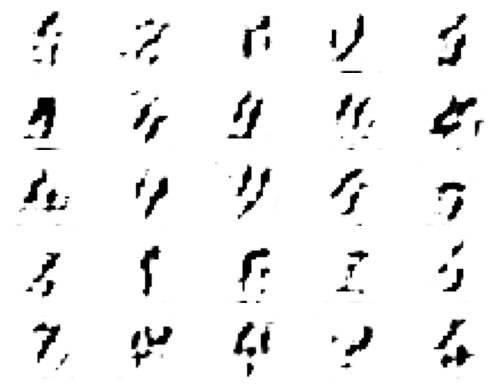

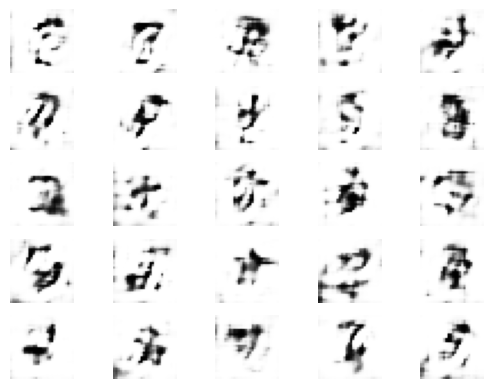

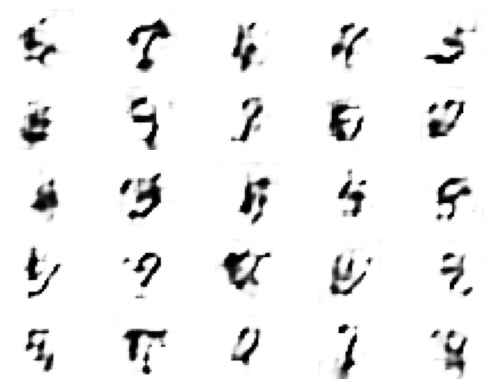

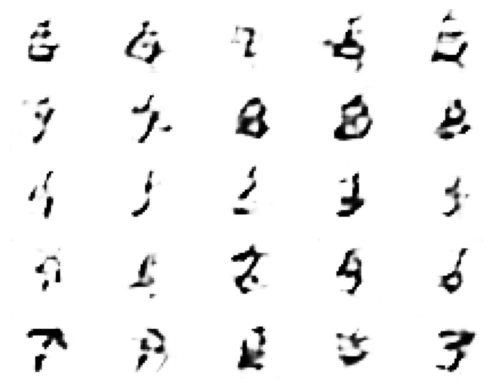

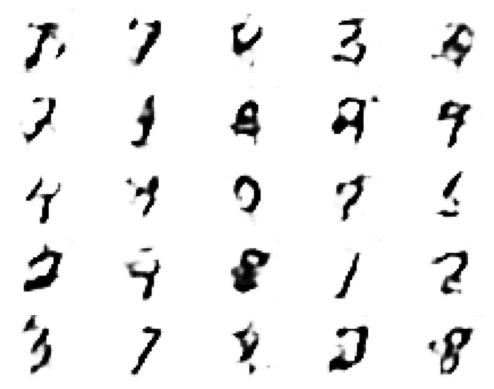

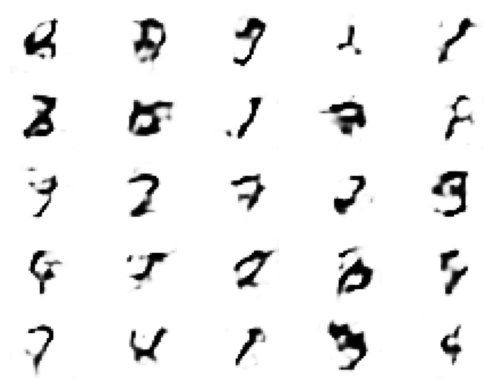

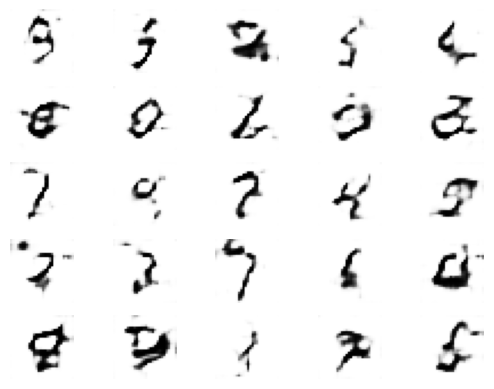

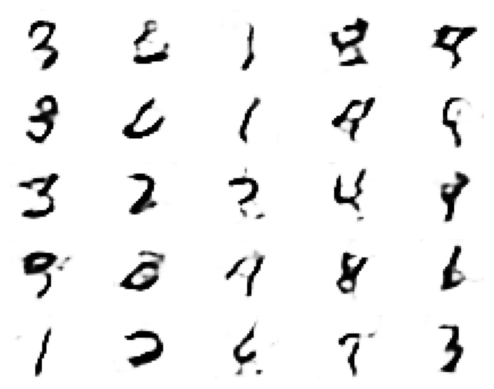

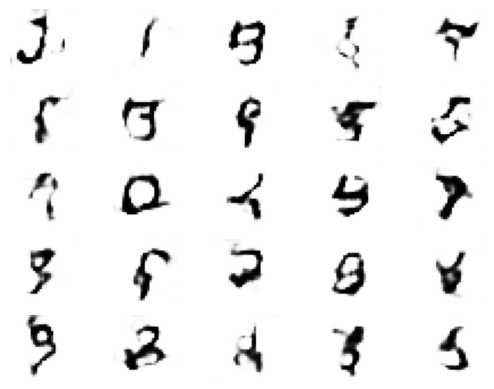

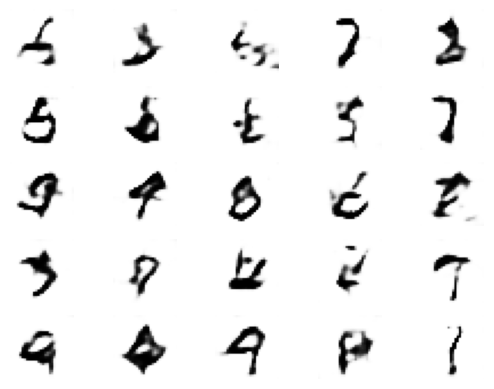

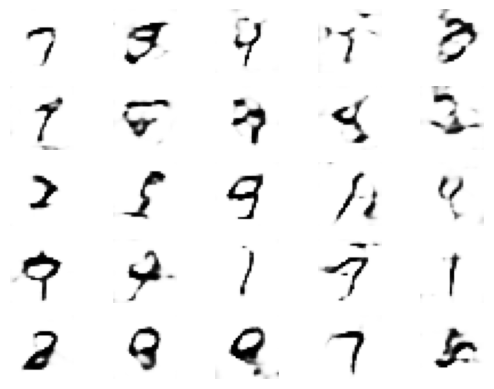

In [23]:
# 신경망을 실행시키는 함수 생성
def gan_train(epoch, batch_size, saving_interval):
    # MNIST 에서 실제 이미지를 가져옴
    (x_train, _), (_,_) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')
    
    # -1 에서 1 사이의 수로 정규화
    x_train = x_train/127.5 -1
    
    true = np.ones((batch_size, 1)) # 1 로 초기화
    fake = np.zeros((batch_size, 1)) # 0 로 초기화
    
    for i in range(epoch):
        # 실제 데이터를 판별자에 입력
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]  # 랜덤으로 실제 이미지 가져옴
        d_loss_real = discriminator.train_on_batch(imgs, true) # 실제 이미지의 loss 값
        
        # 가상 데이터(이미지)를 판별자에 입력
        noise = np.random.normal(0,1,(batch_size,100))
        imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(imgs, fake)
        
        # 판별자와 생성자의 오차 계산
        d_loss = np.add(d_loss_real, d_loss_fake) *0.5
        g_loss = gan.train_on_batch(noise, true)
        
        # 오차 출력
        print('epoch:{:.4f}, d_loss:{:.4f}, g_loss:{:.4f}'.format(epoch, d_loss, g_loss))
        
        # 중간에 생성된 이미지 저장
        if i % saving_interval ==0:
            noise = np.random.normal(0,1,(25,100))
            gen_imgs = generator.predict(noise)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
            
            fig,axs = plt.subplots(5,5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j,k].imshow(gen_imgs[count, :, :, 0], cmap='Greys')
                    axs[j,k].axis('off')
                    count += 1
            fig.savefig('./data/data/gan_images/gan_mnist_{:d}.png'.format(i))
gan_train(2001,32,200)